In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
# Display the first 10 rows of the dataframe
# This helps to get a quick look at the data and understand its structure
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
# Display summary statistics for numerical columns in the dataframe
# This includes count, mean, standard deviation, min, max, and quartiles
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
# Display a concise summary of the dataframe
# This includes information on the number of non-null values, data types of columns, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# Extract the manufacturer and model from the 'name' column
# The 'name' column contains the manufacturer followed by the model
df['manufacturer'] = df['name'].apply(lambda x: x.split()[0])  # Extract the first word as the manufacturer
df['model'] = df['name'].apply(lambda x: ' '.join(x.split()[1:]))  # Extract the remaining words as the model
df.drop('name', axis=1, inplace=True)  # Drop the original 'name' column as it's no longer needed

In [7]:
df.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,manufacturer,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC
5,2007,140000,125000,Petrol,Individual,Manual,First Owner,Maruti,Alto LX BSIII
6,2016,550000,25000,Petrol,Individual,Manual,First Owner,Hyundai,Xcent 1.2 Kappa S
7,2014,240000,60000,Petrol,Individual,Manual,Second Owner,Tata,Indigo Grand Petrol
8,2015,850000,25000,Petrol,Individual,Manual,First Owner,Hyundai,Creta 1.6 VTVT S
9,2017,365000,78000,CNG,Individual,Manual,First Owner,Maruti,Celerio Green VXI


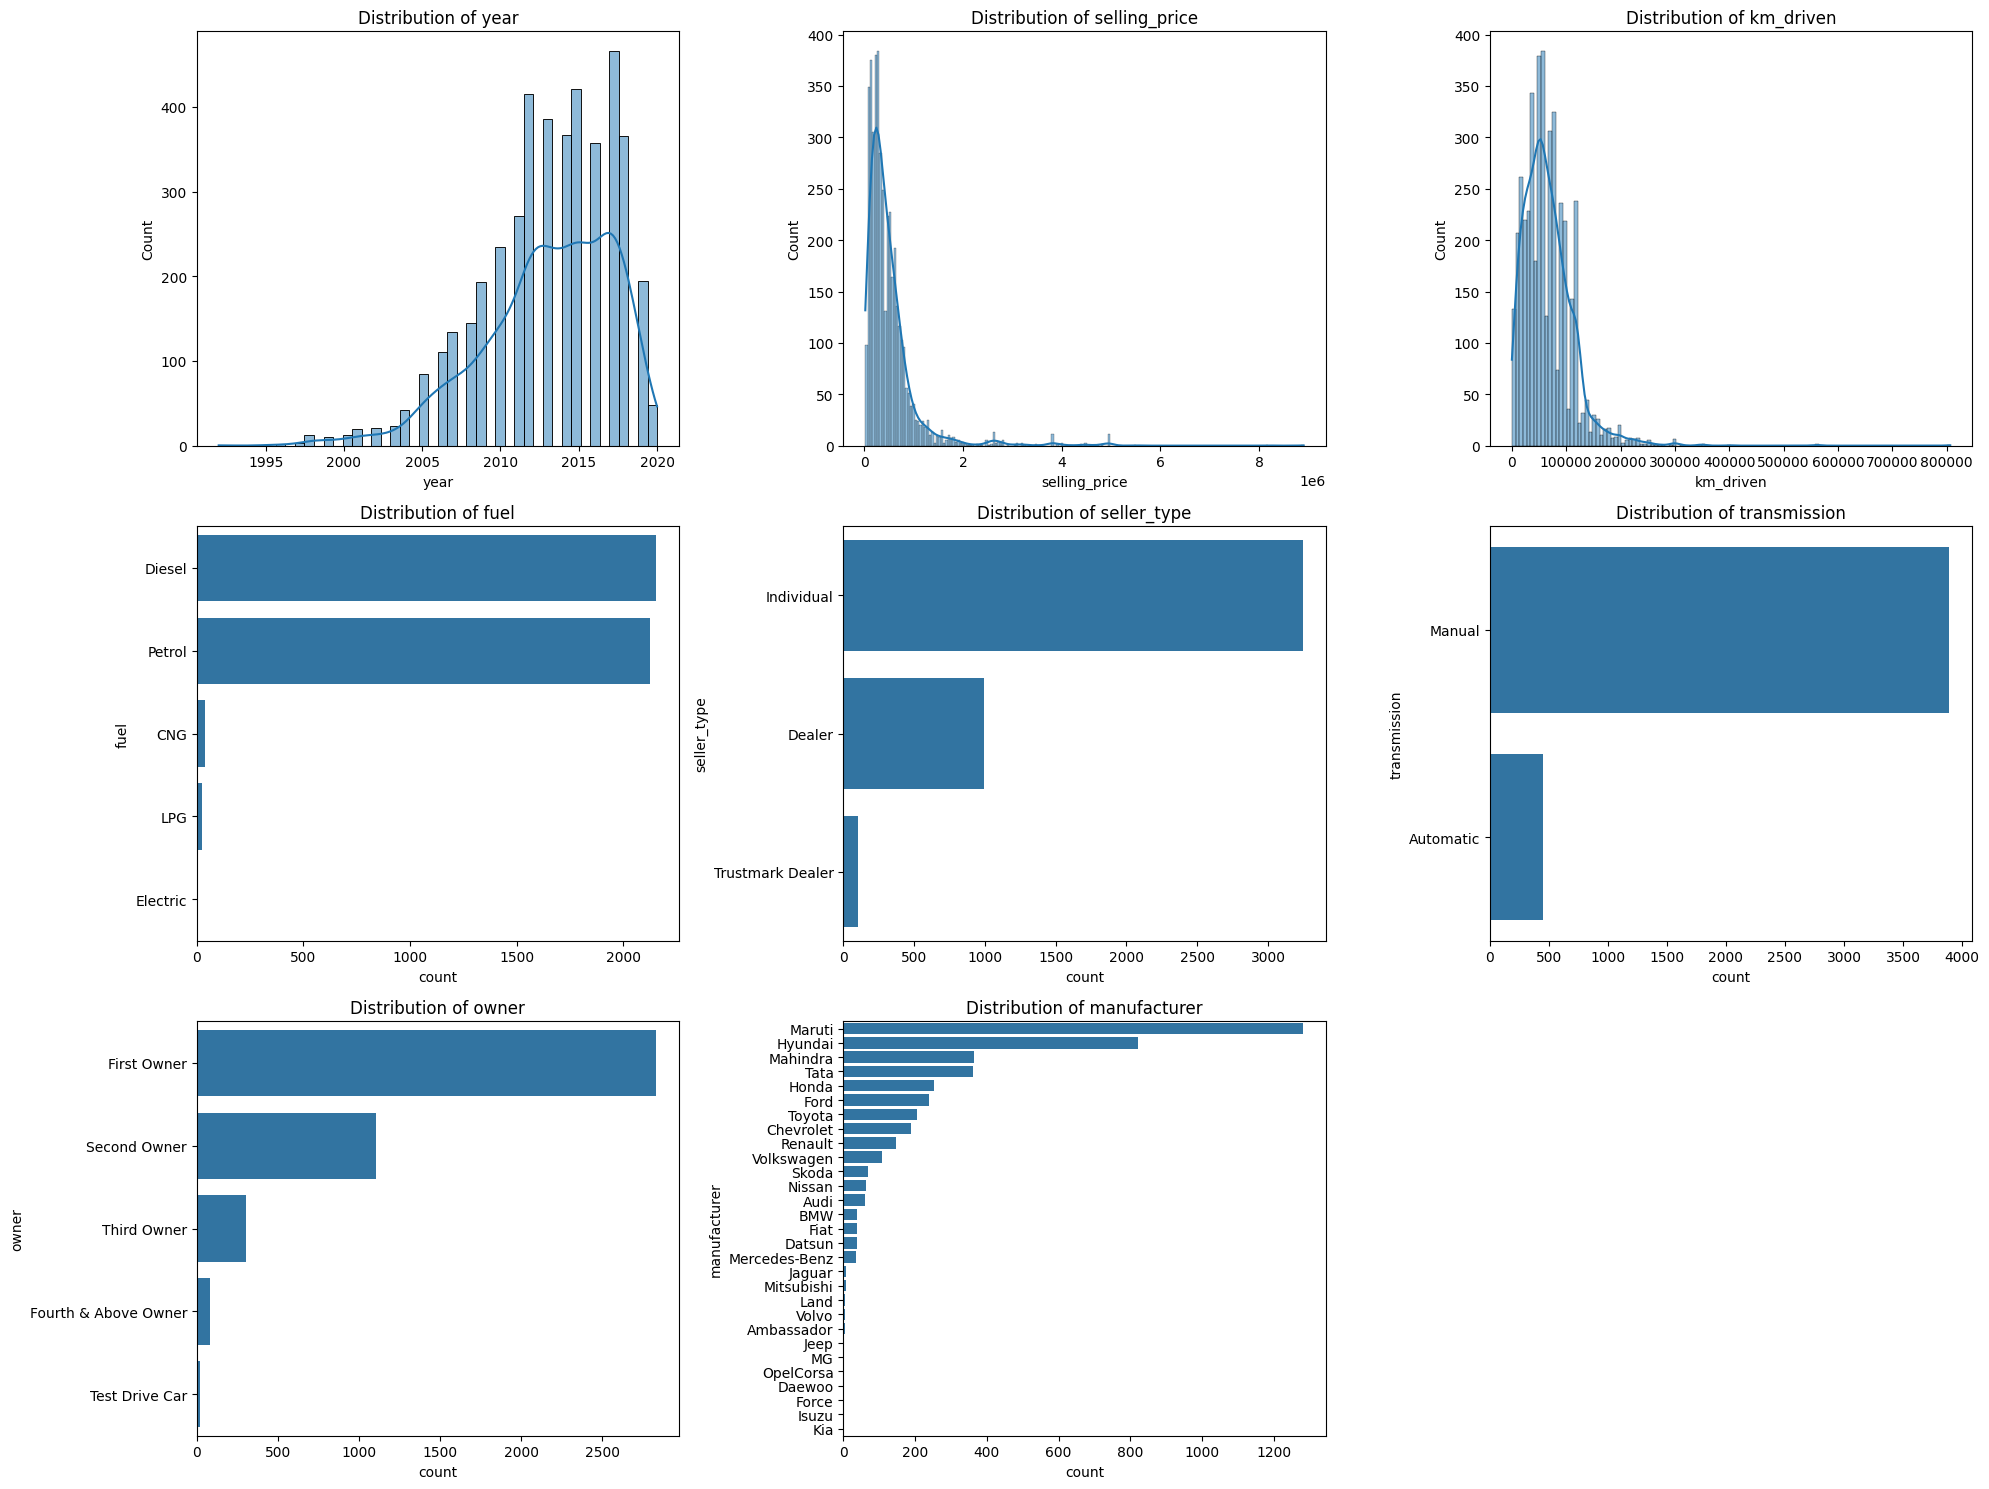

In [8]:
# List of numerical and categorical columns
numerical_columns = ['year', 'selling_price', 'km_driven']
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'manufacturer']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot numerical columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

# Plot categorical columns
for i, column in enumerate(categorical_columns, len(numerical_columns) + 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
# Encode categorical variables into numeric values
label_encoders = {}
for column in ['fuel', 'seller_type', 'transmission', 'owner', 'manufacturer', 'model']:
    label_encoders[column] = LabelEncoder()  # Initialize a label encoder for each categorical column
    df[column] = label_encoders[column].fit_transform(df[column])  # Transform the column values to numeric

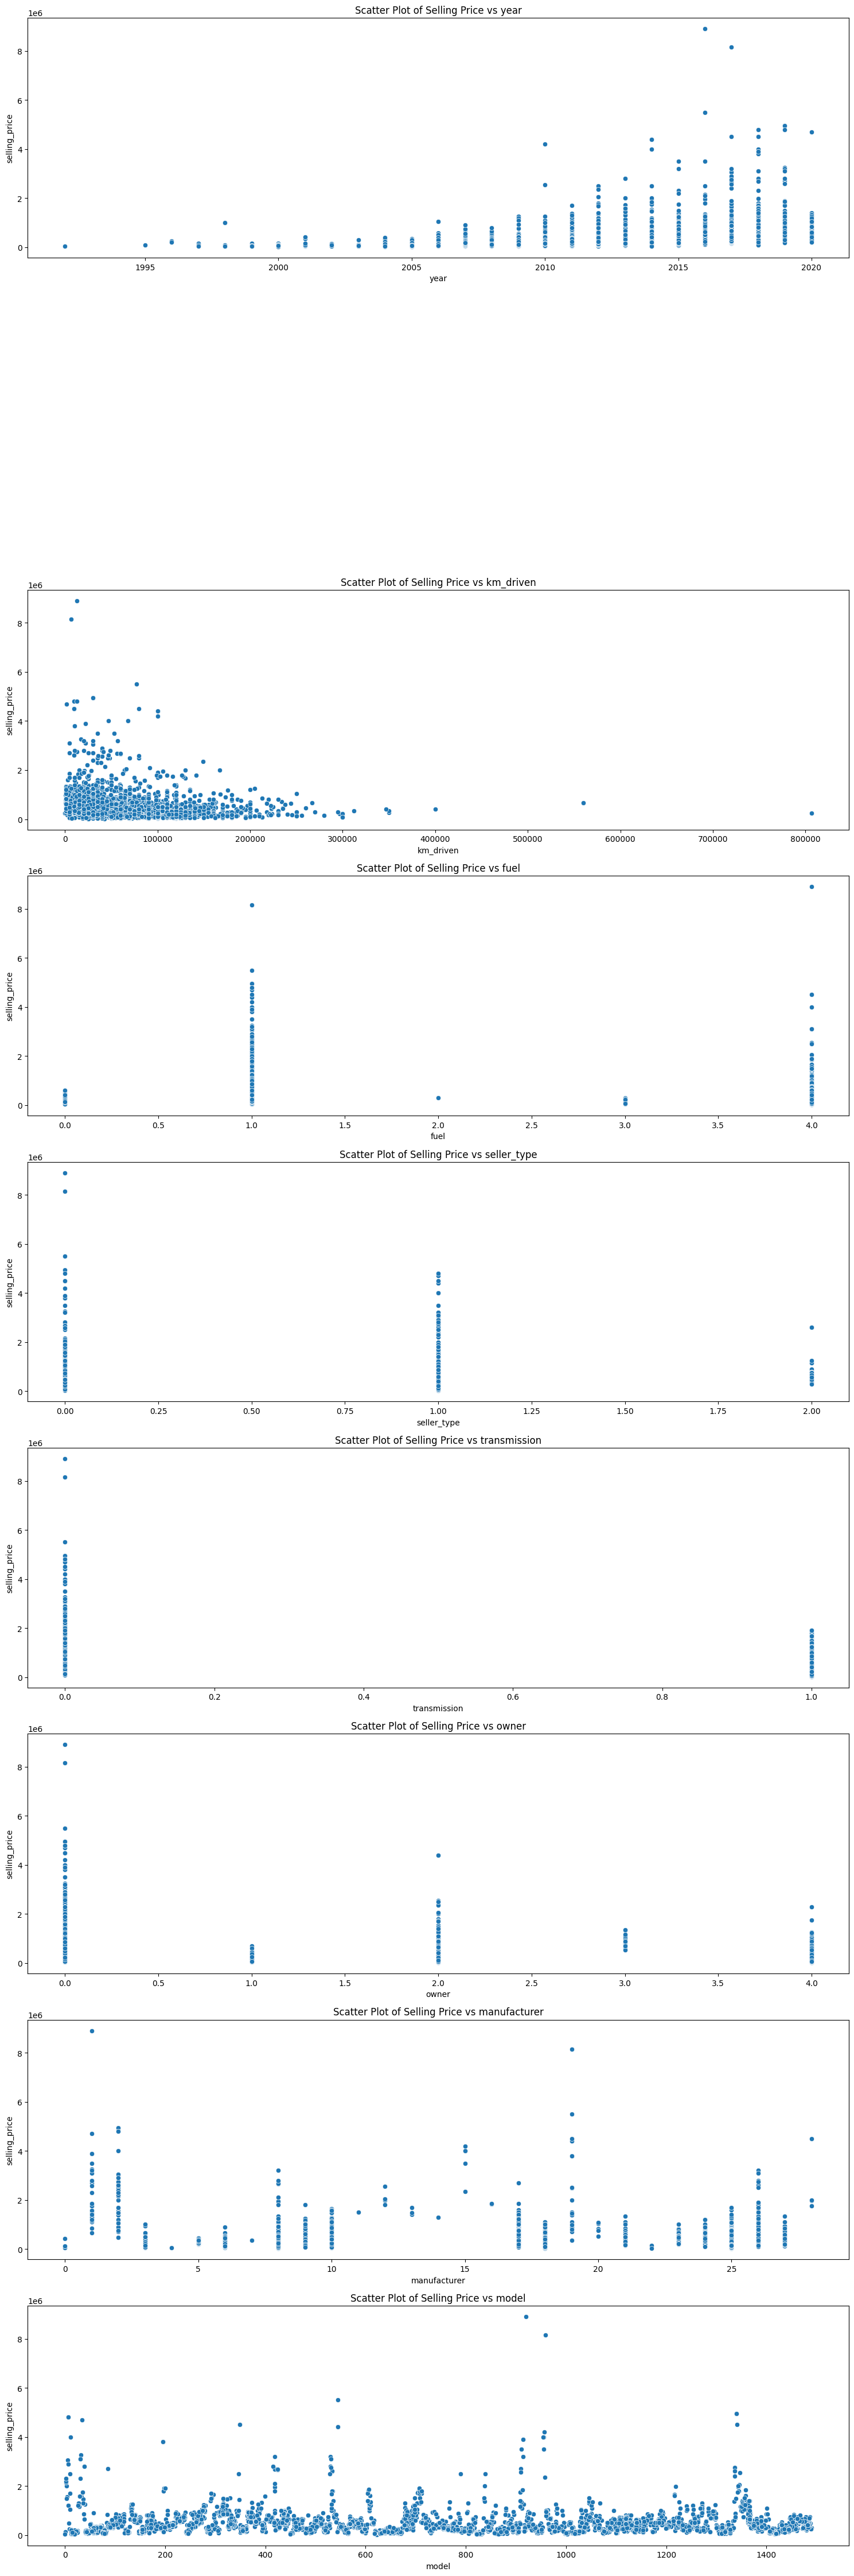

In [10]:
# List of numerical columns
numerical_columns = ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'manufacturer', 'model']

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * len(numerical_columns)))

# Scatter plots for each numerical column against selling_price
for i, column in enumerate(numerical_columns):
    if column != 'selling_price':
        plt.subplot(len(numerical_columns), 1, i + 1)
        sns.scatterplot(x=df[column], y=df['selling_price'])
        plt.title(f'Scatter Plot of Selling Price vs {column}')

plt.tight_layout()
plt.show()

In [11]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,manufacturer,model
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,2.469124,0.794470,0.896774,0.820276,15.561060,735.460369
std,4.215344,5.785487e+05,46644.102194,1.508435,0.458629,0.304289,1.233494,6.810185,453.264916
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,1.000000,1.000000,1.000000,0.000000,10.000000,335.000000
50%,2014.000000,3.500000e+05,60000.000000,1.000000,1.000000,1.000000,0.000000,18.000000,730.500000
75%,2016.000000,6.000000e+05,90000.000000,4.000000,1.000000,1.000000,2.000000,18.000000,1138.000000
max,2020.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.000000,28.000000,1490.000000


In [12]:
# Calculate the correlation matrix to understand the relationships between features
corr_matrix = df.corr()

In [13]:
print(corr_matrix)

                   year  selling_price  km_driven      fuel  seller_type  \
year           1.000000       0.413922  -0.419688 -0.120002    -0.098352   
selling_price  0.413922       1.000000  -0.192289 -0.269653    -0.151554   
km_driven     -0.419688      -0.192289   1.000000 -0.286095     0.113689   
fuel          -0.120002      -0.269653  -0.286095  1.000000     0.038797   
seller_type   -0.098352      -0.151554   0.113689  0.038797     1.000000   
transmission  -0.143800      -0.530205   0.120226  0.039249     0.174925   
owner         -0.414705      -0.207840   0.297115 -0.010910     0.165681   
manufacturer  -0.039724      -0.096858   0.131461 -0.109534     0.144218   
model         -0.023181      -0.018085   0.072835 -0.080230     0.059889   

               transmission     owner  manufacturer     model  
year              -0.143800 -0.414705     -0.039724 -0.023181  
selling_price     -0.530205 -0.207840     -0.096858 -0.018085  
km_driven          0.120226  0.297115      0.13

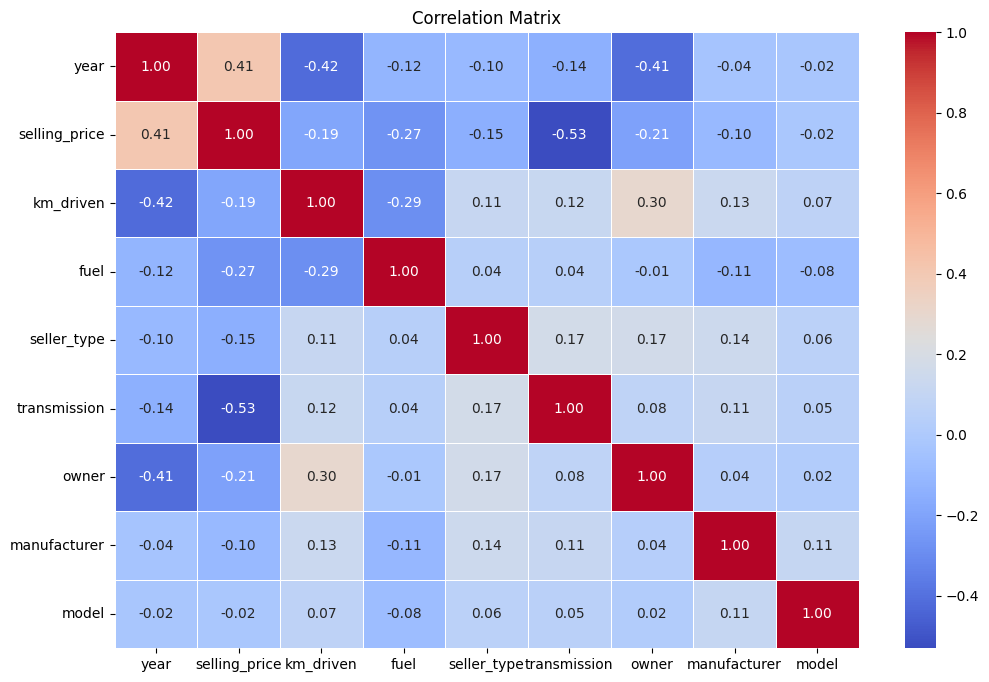

In [14]:
# Plot the correlation matrix using a heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Display correlation values
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Standardize numerical features to have a mean of 0 and a standard deviation of 1
numerical_columns = ['year', 'selling_price', 'km_driven']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [16]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,manufacturer,model
count,4.340000e+03,4.340000e+03,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,-1.894726e-14,-4.747866e-17,-6.548781e-18,2.469124,0.794470,0.896774,0.820276,15.561060,735.460369
std,1.000115e+00,1.000115e+00,1.000115e+00,1.508435,0.458629,0.304289,1.233494,6.810185,453.264916
min,-5.003913e+00,-8.368925e-01,-1.419738e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.960507e-01,-5.106080e-01,-6.693102e-01,1.000000,1.000000,1.000000,0.000000,10.000000,335.000000
50%,2.157170e-01,-2.664340e-01,-1.332750e-01,1.000000,1.000000,1.000000,0.000000,18.000000,730.500000
75%,6.902288e-01,1.657315e-01,5.099672e-01,4.000000,1.000000,1.000000,2.000000,18.000000,1138.000000
max,1.639252e+00,1.451363e+01,1.587486e+01,4.000000,2.000000,1.000000,4.000000,28.000000,1490.000000


In [17]:
# Prepare the feature matrix (X) and the target variable (y)
X = df.drop(columns=['selling_price'])  # Features are all columns except 'selling_price'
y = df['selling_price']  # Target variable is 'selling_price'

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [19]:
# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [21]:
# Calculate evaluation metrics to assess the model's performance
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

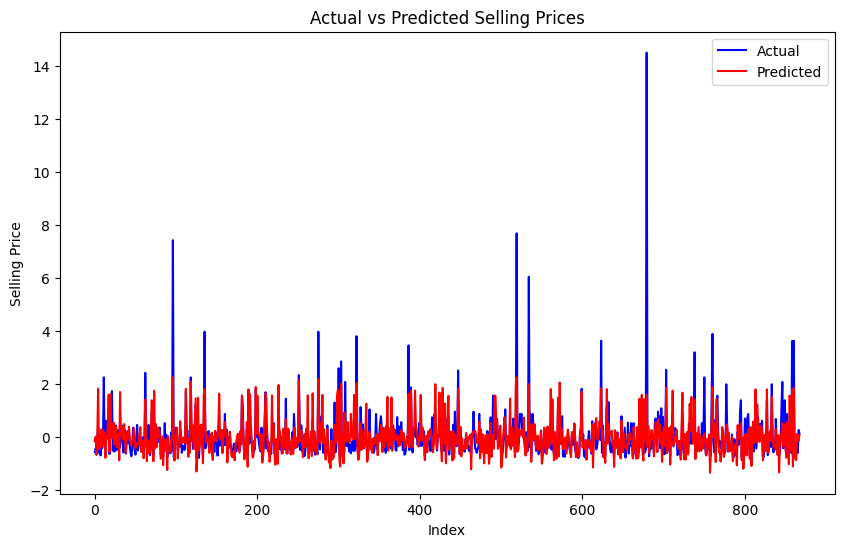

In [22]:
# Plot the actual vs predicted selling prices for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')  # Actual selling prices
plt.plot(y_pred, label='Predicted', color='red')  # Predicted selling prices by the model
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Index')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

In [23]:
# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.3834783262550402
Mean Squared Error (MSE): 0.549495212958805
Root Mean Squared Error (RMSE): 0.741279443232311
